# Node Embeddings Clustering and Profiling

In [1]:
import os
import pandas as pd

os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))

from config import PATH

SEED = 42

In [ ]:
emb_df = pd.read_csv(PATH + 'node_embeddings.csv')

In [24]:
n_rows = emb_df.shape[0]

embedding_cols = emb_df.columns.to_list()
embedding_cols.remove('user_id')

# Remove zeros
emb_df = emb_df.loc[~(emb_df[embedding_cols] == 0.0).all(axis=1)]
print('Removed zero embeddings:')
print(f"Nodes remaining = {emb_df.shape[0]}/{n_rows}")

Removed zero embeddings:
Nodes remaining = 35/42116


In [4]:
nodes_df = pd.read_csv(PATH + 'node_features.csv')
node_columns = nodes_df.columns.tolist()
node_columns.remove('user_id')
df = nodes_df.merge(emb_df, on="user_id", how="inner")

In [5]:
metrics_df = pd.read_csv(PATH + 'graph_metrics.csv')
metrics_df.rename(columns={"node": "user_id"}, inplace=True)
metrics_columns = metrics_df.columns.tolist()
metrics_columns.remove('Unnamed: 0')
metrics_columns.remove('user_id')  
df = df.merge(metrics_df, on="user_id", how="inner")
df.head()

,user_id,user_rt,num_post,user_time_rt,num_post_unverified,num_post_non-rumor,num_post_true,num_post_false,num_rt_unverified,num_rt_non-rumor,...,emb_9,emb_10,emb_11,Unnamed: 0,in_degree,out_degree,katz,eigenvector,pagerank,betweenness
0,134196350,1,1,0.000000,1,0,0,0,1,0,...,-0.053994,-0.020063,-0.038412,462842,1,875,0.001203,2.823545e-10,0.000001,1228666.0
1,1379288282,14,8,670.917222,1,0,0,7,4,1,...,-0.005221,0.007208,0.006943,27342,13,1402,0.003095,5.561143e-04,0.000003,9389886.0
2,139631790,4,0,0.221667,0,0,0,0,3,0,...,-0.079626,-0.423393,0.393527,55175,4,4,0.001572,5.860254e-10,0.000004,1018671.0
3,1598880560,4,0,1.583333,0,0,0,0,0,0,...,0.175432,0.024419,0.343748,155267,4,3,0.001618,3.306524e-06,0.000001,2289024.0
4,1605344245,6,0,1.597000,0,0,0,0,0,0,...,0.245134,0.524380,-0.189420,198879,6,4,0.002234,5.446756e-04,0.000005,1767830.0


In [6]:
df[node_columns].describe()

,user_rt,num_post,user_time_rt,num_post_unverified,num_post_non-rumor,num_post_true,num_post_false,num_rt_unverified,num_rt_non-rumor,num_rt_true,num_rt_false,score,rt_total
count,35.000000,35.000000,35.000000,35.000000,35.0,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,5.285714,0.371429,737.822265,0.085714,0.0,0.028571,0.257143,1.485714,1.342857,1.257143,1.200000,0.387743,99.685714
std,3.593879,1.436616,3039.194598,0.284029,0.0,0.169031,1.220965,2.559543,2.208844,1.820518,2.083549,2.698478,355.398349
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.689041,0.000000
25%,3.000000,0.000000,2.837500,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.547098,0.000000
50%,4.000000,0.000000,89.637500,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.130222,0.000000
75%,6.000000,0.000000,263.008472,0.000000,0.0,0.000000,0.000000,2.000000,2.500000,2.000000,2.000000,2.210888,0.000000
max,16.000000,8.000000,17987.540000,1.000000,0.0,1.000000,7.000000,12.000000,10.000000,6.000000,9.000000,5.706717,1759.000000


In [7]:
df[metrics_columns].describe()

,in_degree,out_degree,katz,eigenvector,pagerank,betweenness
count,35.000000,35.000000,35.000000,3.500000e+01,35.000000,3.500000e+01
mean,4.942857,80.828571,0.001823,8.165091e-04,0.000002,6.391590e+05
std,3.395004,278.834073,0.000567,3.623615e-03,0.000002,1.826684e+06
min,0.000000,1.000000,0.001046,5.739963e-22,-0.000001,0.000000e+00
25%,3.000000,2.000000,0.001479,8.093711e-10,0.000001,1.666667e-01
50%,4.000000,3.000000,0.001617,1.863972e-06,0.000002,2.411000e+03
75%,5.500000,4.500000,0.002082,6.111433e-05,0.000003,1.353392e+05
max,15.000000,1402.000000,0.003417,2.126326e-02,0.000007,9.389886e+06


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df[embedding_cols])

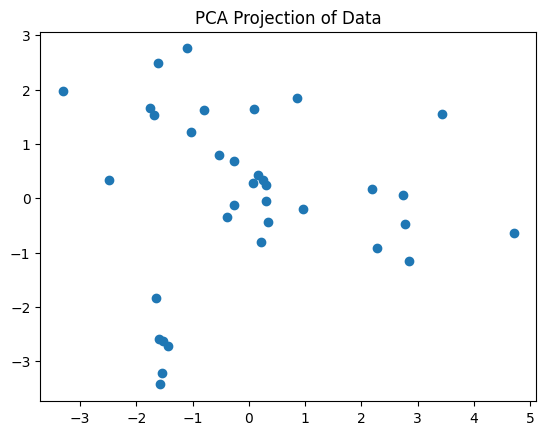

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

plt.scatter(X_2D[:, 0], X_2D[:, 1])
plt.title("PCA Projection of Data")
plt.show()

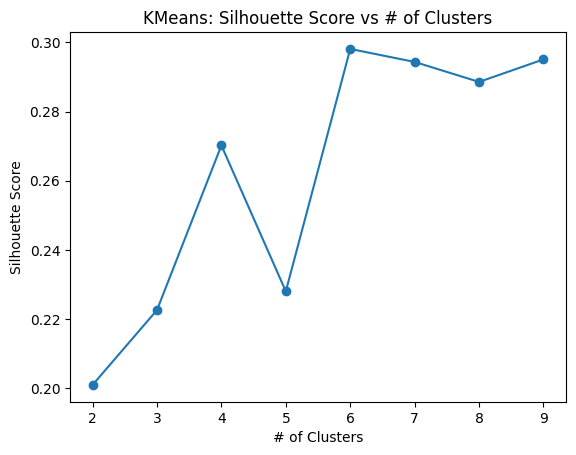

In [10]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

cluster_range = range(2, 10)

scores   = []
inertias = []
for k in cluster_range:
    model = KMeans(n_clusters=k, random_state=SEED)
    model.fit(X)

    scores.append(silhouette_score(X, model.labels_))
    inertias.append(model.inertia_)
    
plt.plot(cluster_range, scores, marker='o')
plt.title("KMeans: Silhouette Score vs # of Clusters")
plt.xlabel("# of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

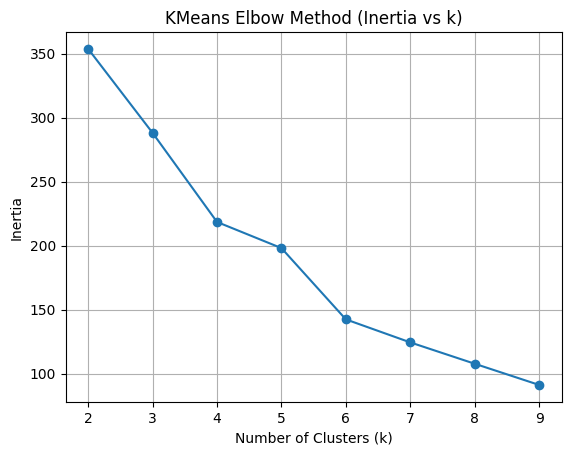

In [11]:
plt.plot(cluster_range, inertias, marker='o')
plt.title("KMeans Elbow Method (Inertia vs k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

<Axes: xlabel='cluster'>

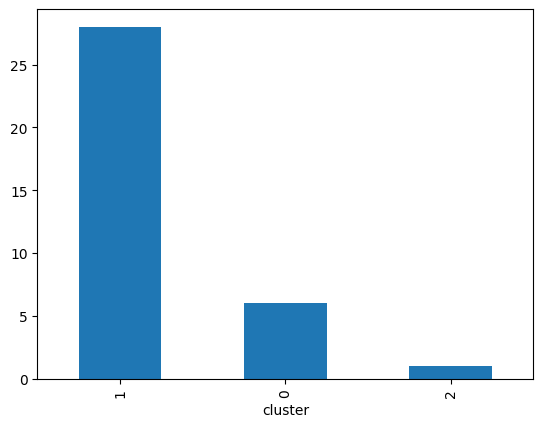

In [12]:
model = KMeans(n_clusters=3, random_state=SEED)
model.fit(X)
df['cluster'] = model.labels_
df['cluster'].value_counts().plot(kind='bar')

In [13]:
df.groupby('cluster')['betweenness'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,6.0,1.546386e+05,3.394856e+05,0.0,0.000000e+00,1.174858e+04,4.959667e+04,846038.0
1,28.0,7.294308e+05,2.028440e+06,0.0,4.583333e-01,2.408000e+03,6.653475e+04,9389886.0
2,1.0,1.018671e+06,NaN,1018671.0,1.018671e+06,1.018671e+06,1.018671e+06,1018671.0


In [14]:
df.groupby('cluster')['score'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,6.0,-0.144608,0.465259,-0.804769,-0.419794,0.000000,1.235537e-10,0.496845
1,28.0,0.487176,3.008340,-9.689041,-0.667191,0.239725,2.241765e+00,5.706717
2,1.0,0.797737,NaN,0.797737,0.797737,0.797737,7.977365e-01,0.797737


In [15]:
df_to_remove = df[df['score'] < 0]
df_to_remove.shape[0]

12

In [16]:
df_to_remove["betweenness"].describe()

count    1.200000e+01
mean     1.434219e+06
std      2.963841e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.972750e+03
75%      7.315425e+05
max      9.389886e+06
Name: betweenness, dtype: float64

In [17]:
df_to_remove['user_id'].to_csv('network/nodes_to_remove/nodes_to_remove.txt', index=False, header=False)

In [18]:
df["score"].describe()

count    35.000000
mean      0.387743
std       2.698478
min      -9.689041
25%      -0.547098
50%       0.130222
75%       2.210888
max       5.706717
Name: score, dtype: float64

In [25]:
df = pd.read_csv(PATH + 'node_features.csv')
metrics_df = pd.read_csv(PATH + 'graph_metrics.csv')
metrics_df.rename(columns={"node": "user_id"}, inplace=True)
metrics_columns = metrics_df.columns.tolist()
metrics_columns.remove('Unnamed: 0')
metrics_columns.remove('user_id')  
df = df.merge(metrics_df, on="user_id", how="inner")

In [26]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np


# Invert score so more negative = more harmful
df["harmfulness"] = -df["score"]


# Normalize both columns to [0, 1]
scaler = MinMaxScaler()
df[["harmfulness_norm", "betweenness_norm"]] = scaler.fit_transform(
    df[["harmfulness", "betweenness"]]
)


In [33]:
alpha = 0.3
df["joint_score"] = alpha * df["harmfulness_norm"] + (1 - alpha) * df["betweenness_norm"]

In [34]:
top_joint = df.sort_values("joint_score", ascending=False).head(87)
top_joint['user_id'].to_csv('network/nodes_to_remove/joint.txt', index=False, header=False)

In [36]:
df["katz"].describe()

count    677640.000000
mean          0.001207
std           0.000140
min           0.001046
25%           0.001150
50%           0.001163
75%           0.001193
max           0.013516
Name: katz, dtype: float64